# TUTORIAL

nota: para paginas que no tiene un version en espanol puedes usar https://translate.google.com/?sjid=16226486302937946575-NA&sl=auto&tl=en&op=websites para una traducion de la pagina

## Creación de un paquete Python
https://packaging.python.org/en/latest/guides/section-build-and-publish/ , no podia encontrar esta pajina en espanol 

### Convertir cuaderno en guión

Convirtamos primero nuestro cuaderno en un script

![image.png](images/convert_to_script.png)

**Demo output of executable script**

Después de limpiarlo un poco, llamaremos a nuestro script calculator.py y tendrá las tres funciones que hemos usado en este cuaderno <br>
![image.png](images/calculator_py.png)

### Crear prueba unitaria

Añadamos también alguna prueba unitaria. El beneficio de las pruebas es que sirve como una forma de documentación, hace futuras refactorizaciones mucho más fácil ya que veremos si rompimos algo inmediatamente y confirma que nuestro código funciona de la manera que creemos que debería funcionar.  Deberíamos intentar probar los casos extremos y las rutas condicionales del código.  <br>

Pondremos nuestras pruebas en una carpeta llamada tests y la llamaremos test_{funcion que estamos probando}.py <br> 

**Bring up the test_calculator.py and run them for demo, and explain some of the test** 

### Convertir script en paquete

A continuación vamos a querer convertir nuestro script en un paquete, mediante la creación de un pyproject-toml <br>
https://packaging.python.org/en/latest/guides/writing-pyproject-toml/ no podia encontrar esta pajina en espanol 

Mi pyproject.toml para este proyecto <br>
![image.png](images/pyprojecttoml_1.png)

Ahora con el pyproject.toml, tenemos la capacidad de instalar nuestro paquete 
usando el comando . pyproject.toml es el formato de archivo especificado de PEP 518 que contiene los requisitos del sistema de construcción de proyectos Python. https://peps.python.org/pep-0518/ 
```
pip install .
```

## Creación y publicación del paquete

1. instale twine 
```
python3 -m pip install twine
```

2. instale build
```
python3 -m pip install build
```
3. Ejecutar build
```
python3 -m build --sdist
```

4.  Vamos a publicar nuestro paquete en testpypi para asegurarnos de que funciona como es debido, si funciona como es debido entonces lo publicaremos en pypi  https://packaging.python.org/en/latest/guides/using-testpypi/, que requiere crear una cuenta en https://test.pypi.org 

5. Después de crear una cuenta es necesario crear un token api para cargar https://test.pypi.org/manage/account/ <br>
![image.png](images/add_api_token.png)

6. Utilizar esta token
Para utilizar este token de API:

    Establezca su nombre de usuario en  __token__
    Establezca su contraseña con el valor del token, incluido el prefijo pypi-

Por ejemplo, si estás usando Twine para subir tus proyectos a PyPI, configura tu archivo $HOME/.pypirc de la siguiente manera.Editaremos el archivo existente o crearemos uno nuevo: 
```
vim $HOME/.pypirc 
```
Ahora añade esto al archivo .pypirc <br>
```
[testpypi] <br>
username = __token__
password = pypi- 
```

7. Cárgalo con
```
twine upload --repository testpypi dist/*
```

8. Ahora podemos ver que nuestro paquete existe en test.pypi <br> 
https://test.pypi.org/project/cafe-data-calculator/0.0.1/ 

9. Ahora podemos instalar nuestro paquete en entornos nuevos y utilizar estas funciones mediante
```
pip install -i https://test.pypi.org/simple/ cafe-data-calculator==0.0.1
```

## Editing an existing package

Si necesitamos hacer cambios en el paquete, tenemos que volver a publicar el paquete

1. Realice sus cambios, a continuación, asegúrese de aumentar la versión en el pyproject.yml en nuestro caso de 0.0.1 a 0.0.2  <br>
![image.png](images/pyprojecttoml_2.png) <br>

2. Construya <br> 
```
python3 -m build --sdist
```
3. Cargar <br>
```
twine upload --repository testpypi dist/*
```
4. Ahora tenemos una nueva versión https://test.pypi.org/project/cafe-data-calculator/0.0.2/ <br>

## Publicación en pypi

1. Como testpypi, tendremos que crear una cuenta en https://pypi.org/
2. a continuación, cree una clave api https://pypi.org/manage/account/ 
3. añadirlo a .pypirc <br>

```
vim $HOME/.pypirc 
```
despues

```
[pypi]
username = __token__
password = pypi-
```

4. Construya <br> 
```
python3 -m build
```

5. Cargar <br>
```
twine upload dist/*
```
Para más detalles:
https://realpython.com/pypi-publish-python-package/#upload-your-package

6. Ahora podemos ver que nuestro paquete está cargado https://pypi.org/project/cafe-data-calculator/0.0.2/ 

## Despliegue

Ahora vamos a desplegar nuestra aplicación en https://mybinder.org/ <br>

### Que mybinder? 
**mybinder.org** es un servicio en línea para construir y compartir entornos computacionales reproducibles e interactivos a partir de repositorios en línea. Se trata de una federación de despliegues de BinderHub mantenidos por la comunidad Binder. Sirve tanto de servicio público como de demostración de la tecnología BinderHub, aunque no es en absoluto el único BinderHub que existe. Si estás interesado en desplegar tu propio BinderHub para tus propios usos, consulta la documentación de BinderHub y no dudes en ponerte en contacto con la comunidad Binder."
https://mybinder.readthedocs.io/en/latest/introduction.html#introduction 

Podemos desplegar el cuaderno y podemos desplegar la aplicación de panel

### Despliegue del portátil

Vaya a mybinder.org e introduzca los campos correspondientes. Tenga en cuenta que el cuaderno puede tardar un poco en aparecer. <br>
![image.png](images/binder.png) <br>

Después podemos compartir el enlace o añadir un bonito banner a nuestro Readme

Link: https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?labpath=clean_calculator.ipynb <br>
Banner: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?labpath=clean_calculator.ipynb)

### Despliegue de la aplicación de panel

Crear la versión de la aplicación del panel https://panel.holoviz.org/how_to/deployment/binder.html 
1. Añade un environment.yml que declare un entorno conda con las dependencias necesarias para ejecutar la aplicación (consulta la documentación de conda para ver cómo declarar tus dependencias). Añade jupyter_panel_proxy como dependencia añadiendo conda-forge o pyviz a la lista de canales.

2.   Para este repositorio, nuestro environment.yml tendrá el siguiente aspecto <br>
![image.png](images/environmentyml.png) <br>

3. Asegúrese de que tiene servable en su portátil, de lo contrario obtendrá un error  <br>
![image.png](images/servableExample.png) <br>
Servable https://panel.holoviz.org/getting_started/core_concepts.html <br>
Siempre que marque un objeto como .servable lo estará insertando en una plantilla. Por defecto el Panel utiliza una plantilla completamente en blanco, pero es muy sencillo seleccionar otra plantilla configurando pn.config.template. Aquí tendrá unas cuantas opciones basadas en distintos frameworks, incluyendo 'bootstrap', 'material' y 'fast'. En el bloc de notas el método .servable() es efectivamente un no-op. Esto significa que puedes añadir los componentes que quieras a la aplicación renderizada pero también verlos renderizados en línea. Esto hace posible construir componentes secuencialmente en un cuaderno mientras simultáneamente se construye una aplicación para ser servida. Si quieres marcar algo como servible pero no quieres que se renderice en línea, simplemente pon un punto y coma (';') después de él para decirle a Jupyter que no lo renderice aunque sea el último elemento de la celda.

4. A continuación, podemos tomar nuestro enlace binder original menos labpath https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main y luego añadir ?urlpath=/panel/{name of our app notebook}, <br>   

**https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?urlpath=/panel/clean_calculator**

Link : https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?urlpath=/panel/clean_calculator <br>
Banner: [![app](https://img.shields.io/badge/launch-binder%20app-579ACA.svg?logo=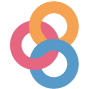)](https://mybinder.org/v2/gh/EduardoLZevallos/cafe_data_calculator.git/main?urlpath=/panel/clean_calculator) 

## Additional Resources

1. Instalar jupyter-lab  https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html 

2. Registrar el kernel  https://saturncloud.io/blog/how-to-add-a-python-3-kernel-to-jupyter-ipython/#step-3-install-the-ipython-kernel-package 

3. Para cambiar jupyter lab a español ejecuta
```
pip install jupyterlab-language-pack-ca-ES
```
https://jupyterlab.readthedocs.io/en/stable/user/language.html